In [2]:
import numpy as np
import matplotlib.pyplot as plt
import irf
from irf.ensemble import wrf as rfc
from irf.utils import (
    get_prevalent_interactions,
    visualize_impurity_decrease,
    visualize_prevalent_interactions,
    get_filtered_feature_paths
)
import rpy2.robjects as robjects
from irf.irf_jupyter_utils import draw_tree

# Simulate the settings in the signed iRF paper

## Simulation 1: and rule

In [3]:
def load_data(i=0):
    robjects.r['load']("../../signediRF/data/gaussSim_and.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [4]:
X, y = load_data(42)

In [5]:
rf = rfc()

In [6]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

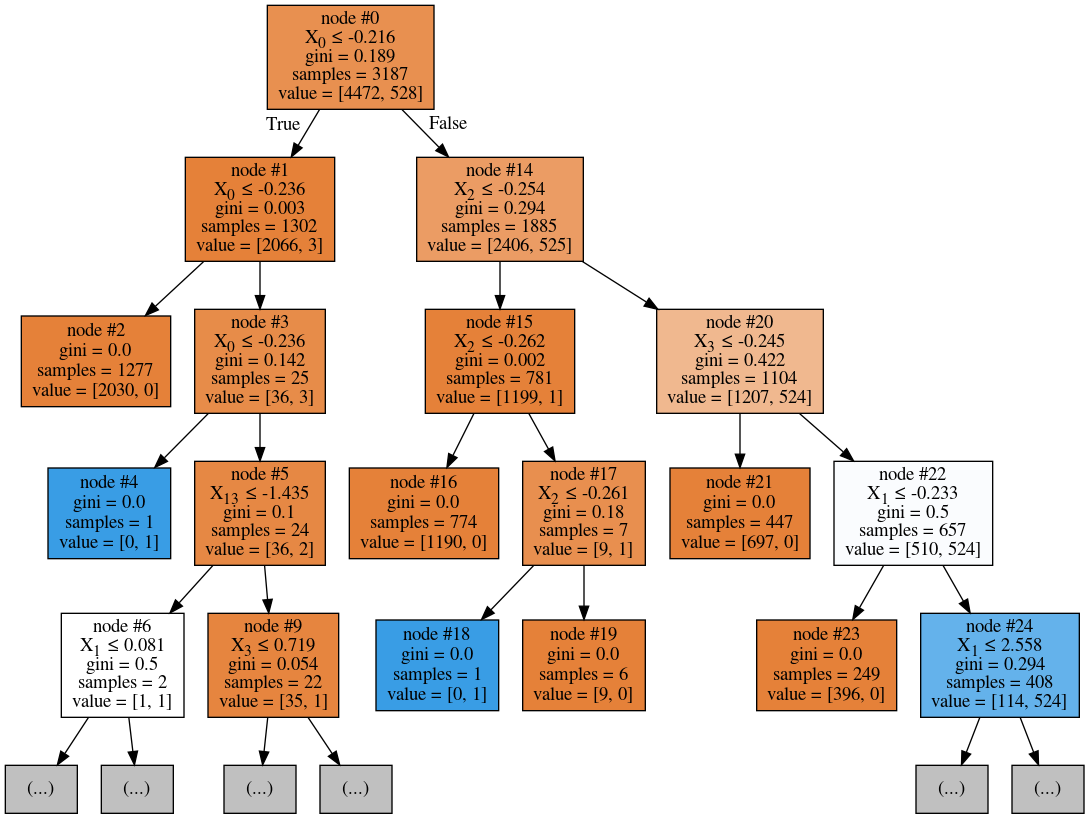

In [7]:
draw_tree(rf.estimators_[0], max_depth=4)

<BarContainer object of 50 artists>

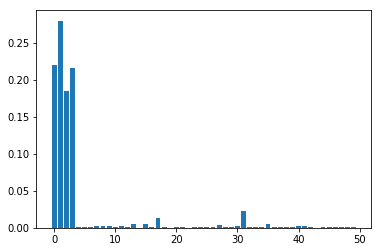

In [8]:
plt.bar(np.arange(50), rf.feature_importances_)

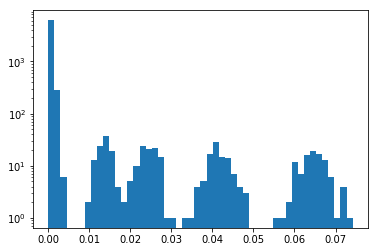

In [9]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [12]:
rf.n_paths

7247

In [1]:
500 * 16

8000

In [15]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(
    rf,
    impurity_decrease_threshold=0.005,
    min_support=rf.n_paths // 32,
    signed=True,
    weight_scheme="depth",
)

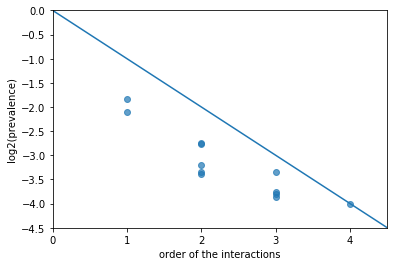

In [16]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [17]:
list(prevalence.items())[:20]

[(((0, 'R'), (1, 'R'), (2, 'R'), (3, 'R')), 0.06250000000000011),
 (((0, 'R'), (2, 'R'), (3, 'R')), 0.09812500000000024),
 (((1, 'R'), (2, 'R'), (3, 'R')), 0.07375000000000023),
 (((0, 'R'), (1, 'R'), (2, 'R')), 0.07187500000000023),
 (((0, 'R'), (1, 'R'), (3, 'R')), 0.06875000000000037),
 (((2, 'R'), (3, 'R')), 0.14812500000000117),
 (((0, 'R'), (2, 'R')), 0.1475000000000013),
 (((0, 'R'), (3, 'R')), 0.10812500000000032),
 (((1, 'R'), (2, 'R')), 0.09812500000000036),
 (((1, 'R'), (3, 'R')), 0.09500000000000038),
 (((2, 'R'),), 0.2800000000000032),
 (((3, 'R'),), 0.23312500000000244)]

## Simulation 2: OR rule

In [18]:
def load_data(i=0):
    robjects.r['load']("../../signediRF/data/gaussSim_or.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [19]:
X, y = load_data(10)

In [20]:
rf = rfc()

In [21]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

<BarContainer object of 50 artists>

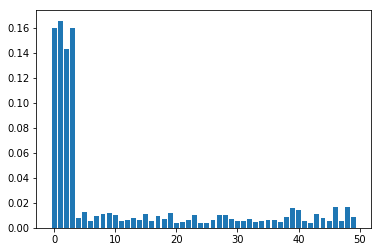

In [22]:
plt.bar(np.arange(50), rf.feature_importances_)

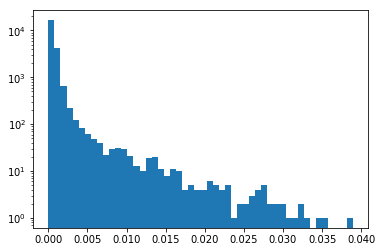

In [23]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [27]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(
    rf,
    impurity_decrease_threshold=1e-3,
    min_support=rf.n_paths // 2 ** 5,
    signed=True,
    weight_scheme="depth",
)

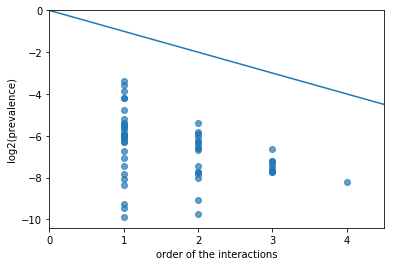

In [28]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [29]:
#visualize find out the most prevalent interactions
list(prevalence.items())[:20]

[(((0, 'R'), (1, 'R'), (2, 'L'), (3, 'L')), 0.003345804811106055),
 (((1, 'L'), (2, 'R'), (3, 'R')), 0.010059465067461106),
 (((0, 'L'), (2, 'R'), (3, 'R')), 0.006809957642108187),
 (((0, 'R'), (1, 'R'), (2, 'L')), 0.006711890737351477),
 (((0, 'L'), (1, 'L'), (3, 'R')), 0.006207636781036849),
 (((0, 'L'), (1, 'L'), (2, 'R')), 0.00559835001917235),
 (((1, 'R'), (2, 'L'), (3, 'L')), 0.004980894179025187),
 (((0, 'R'), (1, 'R'), (3, 'L')), 0.004726746644009826),
 (((0, 'R'), (2, 'L'), (3, 'L')), 0.004685880696088122),
 (((0, 'L'), (3, 'R')), 0.024171353084966585),
 (((1, 'L'), (2, 'R')), 0.017585600079546584),
 (((2, 'R'), (3, 'R')), 0.016840583246739718),
 (((1, 'L'), (3, 'R')), 0.014967696182720817),
 (((0, 'R'), (2, 'L')), 0.013034268150076963),
 (((0, 'R'), (1, 'R')), 0.012768524338316635),
 (((0, 'L'), (2, 'R')), 0.012007104516414974),
 (((1, 'R'), (3, 'L')), 0.01046954428005846),
 (((2, 'L'), (3, 'L')), 0.010434387443783638),
 (((0, 'R'), (3, 'L')), 0.009615869512272172),
 (((0, 'R

## Simulation 3: Add rule

In [30]:
def load_data(i=0):
    robjects.r['load']("../../signediRF/data/gaussSim_add.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [31]:
X, y = load_data(5)

In [32]:
rf = rfc(bootstrap=True)

In [33]:
rf.fit(X, y, keep_record=False, K=10)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

<BarContainer object of 50 artists>

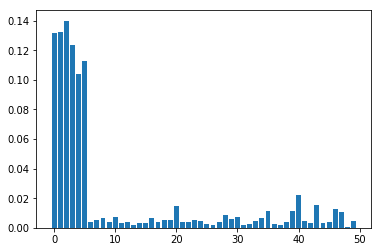

In [34]:
plt.bar(np.arange(50), rf.feature_importances_)

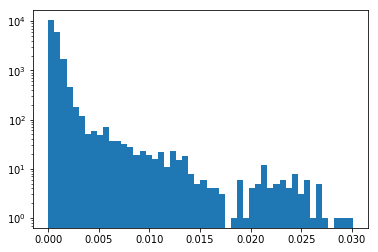

In [35]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [36]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(
    rf,
    impurity_decrease_threshold=0.001,
    min_support=rf.n_paths // 2 ** 7,
    signed=True,
    weight_scheme="samplesize",
)

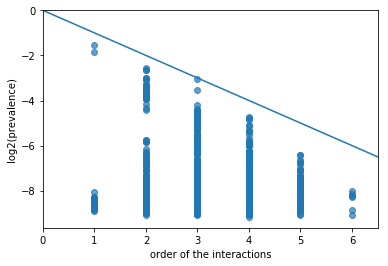

In [37]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [39]:
#visualize find out the most prevalent interactions
list(prevalence.items())[:20]

[(((0, 'R'), (1, 'R'), (2, 'R')), 0.11947000000000638),
 (((3, 'R'), (4, 'R'), (5, 'R')), 0.08639600000000273),
 (((0, 'R'), (1, 'R'), (2, 'R'), (3, 'L')), 0.03736199999999987),
 (((0, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.03595799999999972),
 (((0, 'R'), (1, 'R'), (2, 'R'), (3, 'R')), 0.0340579999999998),
 (((1, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.029359999999999768),
 (((0, 'R'), (2, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.011826000000000053),
 (((0, 'R'), (1, 'R'), (2, 'R'), (3, 'R'), (5, 'R')), 0.011748000000000043),
 (((0, 'R'), (1, 'R'), (2, 'R'), (5, 'R')), 0.028251999999999798),
 (((0, 'R'), (2, 'R')), 0.16768200000001093),
 (((1, 'L'), (2, 'R'), (3, 'R'), (4, 'R'), (5, 'R')), 0.010150000000000015),
 (((2, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.025333999999999794),
 (((1, 'R'), (2, 'R')), 0.1582980000000098),
 (((0, 'R'), (1, 'R')), 0.15810600000001016),
 (((0, 'R'), (1, 'R'), (2, 'R'), (3, 'L'), (5, 'R')), 0.00984400000000002),
 (((0, 'R'), (1, 'L'), (2, 'R'), (3, 'R'), (4,